In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from scipy.stats import spearmanr

pd.options.display.max_columns = None
pd.options.display.max_rows = None

import wrangle

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()


In [2]:
df = wrangle.get_explore_data()

In [3]:
df = wrangle.prep_data(df, features = wrangle.features)

In [4]:
df = wrangle.rename_data(df)

In [5]:
df.shape

(375734, 20)

In [6]:
train, validate, test = wrangle.split_data(df)

In [7]:
df = train.copy()

In [8]:
df.shape

(244226, 20)

## STOP AUTO RUN

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

### how is the mean calculated? where does the 3939 come from ? does that mean another nmme column has 3939 uniuqe values?

In [ ]:
df.nmme0mean.nunique()

In [ ]:
df['nmme-tmp2m-34w__cancm4'].nunique()

#### end of nmme nununique rabbit chase for now

In [ ]:
df.describe().T

In [ ]:
df.shape

### group by latitude to deternime how many locations.

In [ ]:
df_lat = df.groupby('lat')

In [ ]:
df_lat.lon.value_counts()

<div class="alert alert-block alert-success">
<b>Finding:</b>  375734 obervations with 731 per location means there are 514 locations use green boxes for 
related links from each section of a notebook.
</div>

In [ ]:
df_lat.head()

In [ ]:
df.lon.value_counts()


### looking at regions

In [63]:
sns.set(rc={'figure.figsize':(16,9)})

In [ ]:
regions = pd.DataFrame(df.groupby('region'))

In [ ]:
regions.head()

In [ ]:
regions.shape

In [ ]:
regions

In [ ]:
df.region.value_counts()

In [ ]:
df[df.region=='BSk'].mean_temp.hist()

## looking for patterns, correlation, significance in elevation.
#### stats: 
- elevation 320 is in region Dbf
- 480 = Csb
- higher altitude = lower temperatures (duh)
- all three ranges of elevation have correlation to mean temp to varying degrees: 
    - low : corr coef = -0.207
    - mid: corr coef= -0.070
    - high: corr coef = -0.138
#### fishes: 
- there are 731 observations for 21 elevation levels


In [ ]:
df.elevation.value_counts().sort_values()

In [ ]:
df[df.elevation == 200.0].region.nunique()

In [ ]:
df[df.elevation == 480.0]

In [ ]:
df.groupby('elevation').mean_temp.mean()

In [ ]:
# calculate spearman's correlation
coef, p = spearmanr(df.elevation, df.mean_temp)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)


In [ ]:
df.elevation.hist()

In [ ]:
df.mean_temp.hist()

In [ ]:
sns.histplot(data=df, x="mean_temp", hue="elevation")

In [41]:
elevation_low_low=df[df.elevation < 500.0]

In [42]:
elevation_low_low.groupby('elevation').mean_temp.mean()

elevation
0.0      18.429188
50.0     21.742061
60.0     21.205892
80.0     21.416282
90.0     22.609616
100.0    16.424203
200.0    18.751033
260.0    15.389702
300.0    15.574833
320.0     5.696379
350.0    21.833065
370.0    11.193177
400.0    12.367618
430.0    25.016378
480.0     9.755513
490.0     5.636828
Name: mean_temp, dtype: float64

<AxesSubplot:xlabel='mean_temp', ylabel='Count'>

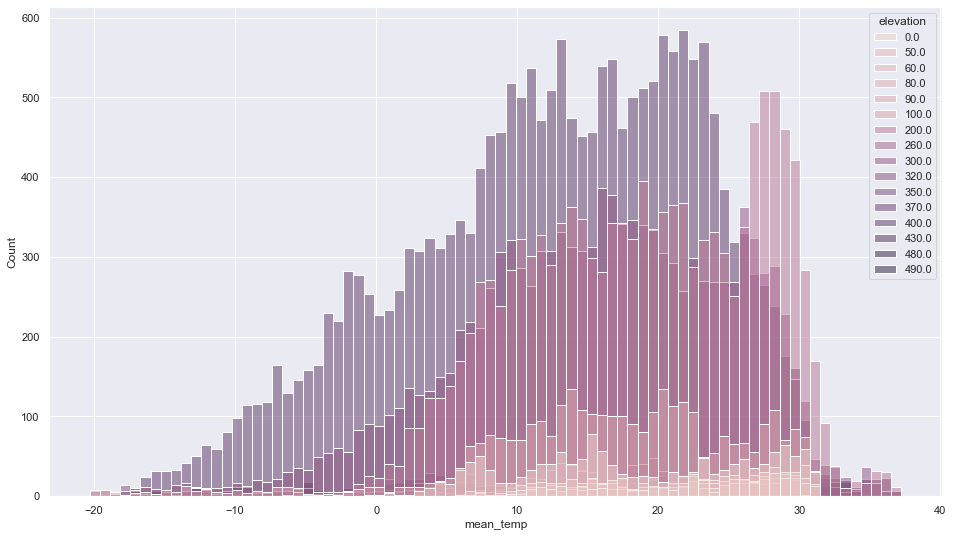

In [64]:
sns.histplot(data=elevation_low_low, x="mean_temp", hue="elevation")

In [44]:
elevation_low=df[(df.elevation > 500.0)&(df.elevation <1000)]

In [45]:
elevation_low.groupby('elevation').mean_temp.mean()

elevation
560.0     8.015365
570.0    20.942522
600.0    10.360747
700.0    11.714039
750.0    13.140644
780.0    11.222450
800.0    12.357877
850.0     8.241871
890.0    19.535371
900.0    11.291323
Name: mean_temp, dtype: float64

<AxesSubplot:xlabel='mean_temp', ylabel='Count'>

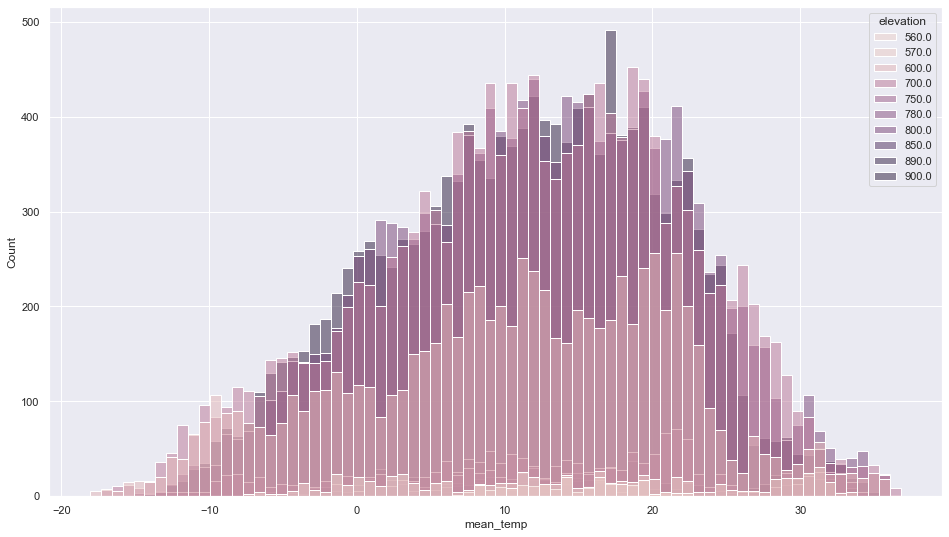

In [65]:
sns.histplot(data=elevation_low, x="mean_temp", hue="elevation")

In [15]:
# calculate spearman's correlation
coef, p = spearmanr(elevation_low.elevation, elevation_low.mean_temp)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)



Spearmans correlation coefficient: -0.205
Samples are correlated (reject H0) p=0.000


In [16]:
elevation_mid = df[(df.elevation >1000.0) & (df.elevation < 2000.0)]

In [17]:
elevation_mid.groupby('elevation').mean_temp.mean()

elevation
1050.0    15.079337
1100.0    12.590587
1150.0     7.730582
1200.0    13.014463
1250.0    12.624854
1300.0    10.032757
1400.0    10.733857
1500.0    11.421234
1600.0    10.727960
1700.0    11.531066
1800.0    10.826126
1900.0     9.704415
Name: mean_temp, dtype: float64

<AxesSubplot:xlabel='mean_temp', ylabel='Count'>

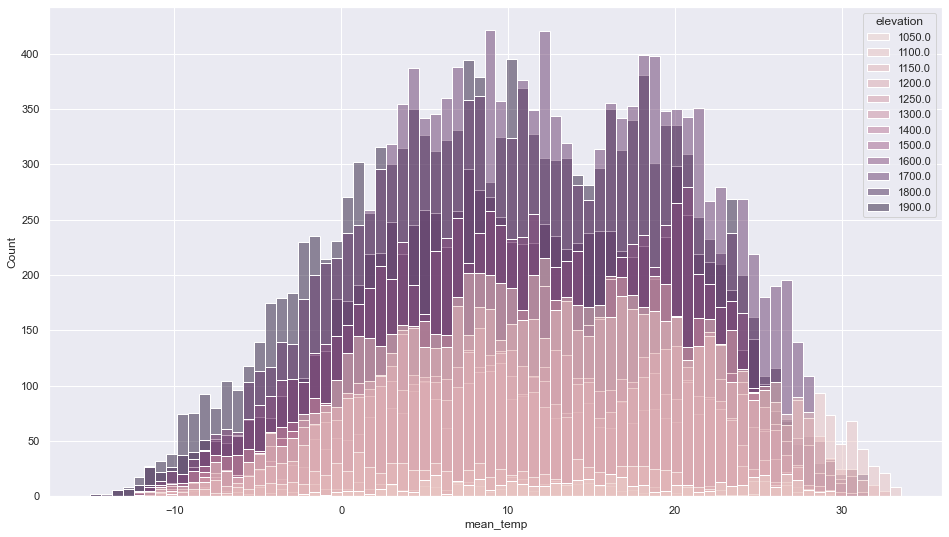

In [66]:
sns.histplot(data=elevation_mid, x="mean_temp", hue="elevation")

In [19]:
# calculate spearman's correlation
coef, p = spearmanr(elevation_mid.elevation, elevation_mid.mean_temp)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.070
Samples are correlated (reject H0) p=0.000


In [20]:
elevation_high = df[df.elevation > 2000.0]

In [21]:
elevation_high.groupby('elevation').mean_temp.mean()

elevation
2100.0    7.835408
2200.0    7.679968
2300.0    8.471887
2400.0    5.155741
2500.0    6.217725
2600.0    3.920866
2700.0    9.046748
2800.0    3.809400
2850.0    2.633381
3100.0    1.800677
Name: mean_temp, dtype: float64

<AxesSubplot:xlabel='mean_temp', ylabel='Count'>

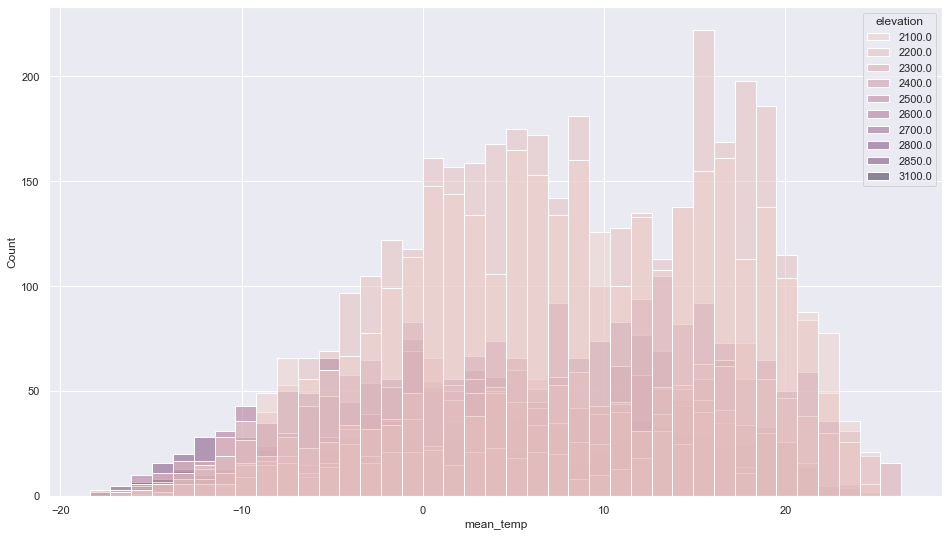

In [67]:
sns.histplot(data=elevation_high, x="mean_temp", hue="elevation")

In [23]:
# calculate spearman's correlation
coef, p = spearmanr(elevation_high.elevation, elevation_high.mean_temp)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.136
Samples are correlated (reject H0) p=0.000


In [34]:
df.columns

Index(['region', 'elevation', 'lat', 'lon', 'startdate', 'potential_evap',
       'precip', 'barometric_pressure', 'all_atmos_precip',
       'relative_humidity', 'sea_level_press', 'mean_temp', 'height_10_mb',
       'height_100_mb', 'height_500_mb', 'height_850_mb', 'zonal_wind_250mb',
       'zonal_wind_925mb', 'long_wind_250mb', 'long_wind_925mb'],
      dtype='object')

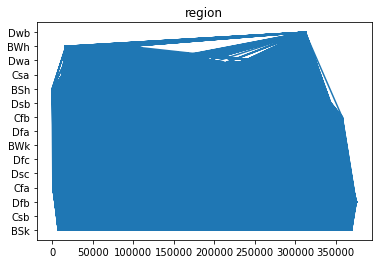

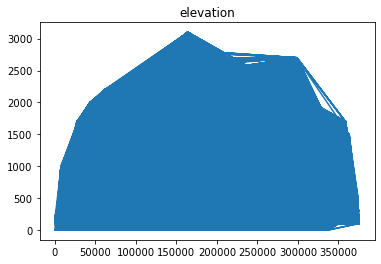

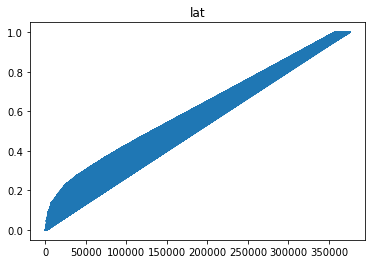

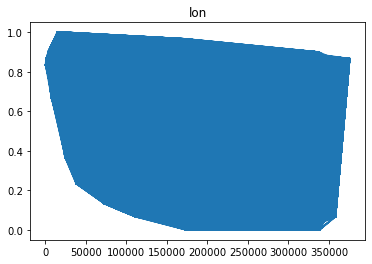

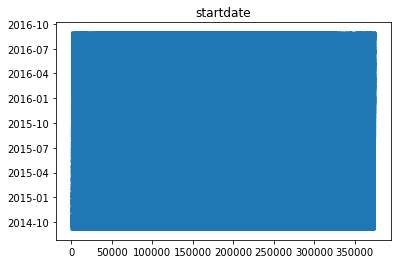

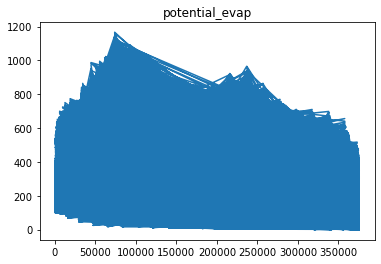

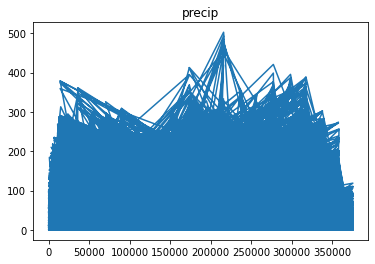

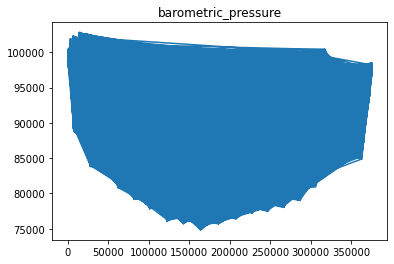

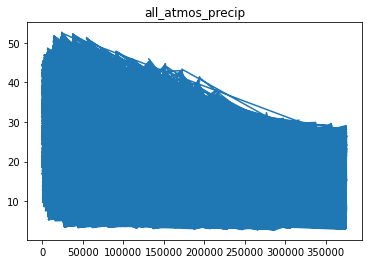

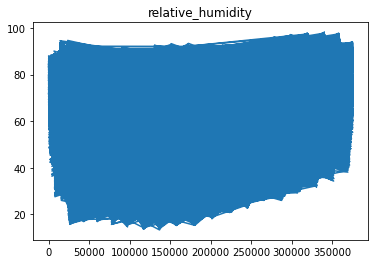

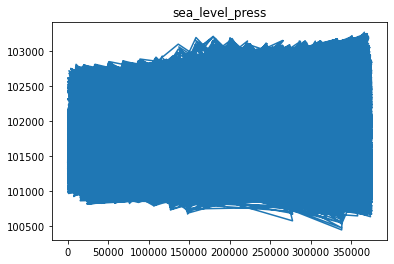

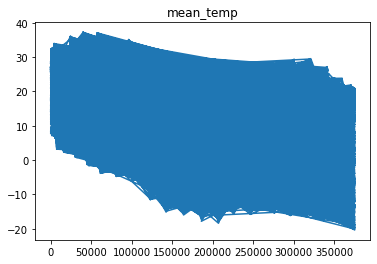

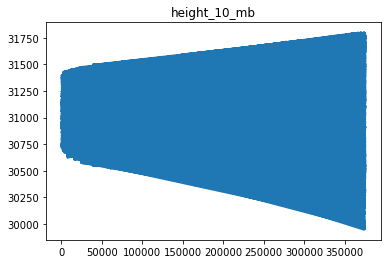

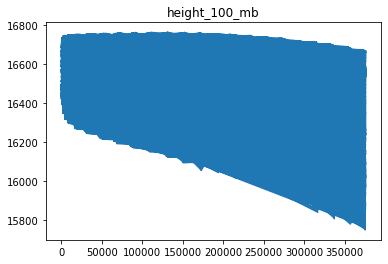

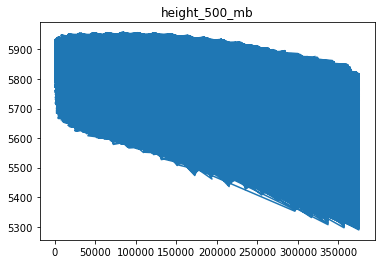

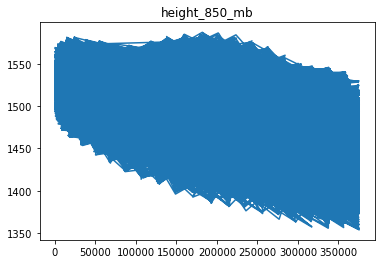

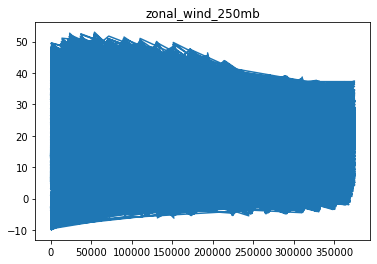

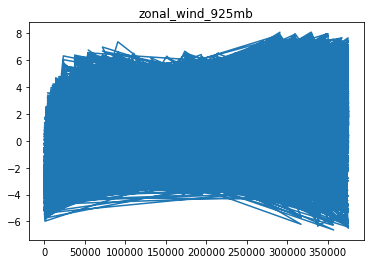

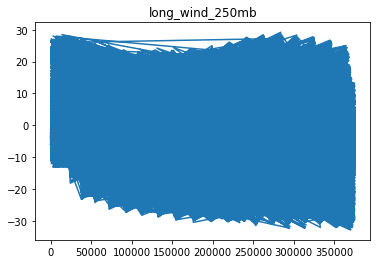

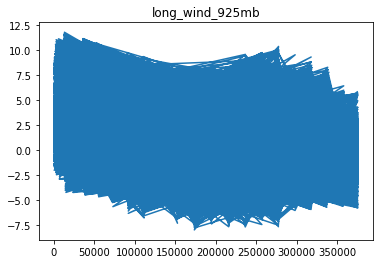

In [26]:
for col in df.columns:
    plt.plot(df[col])
    plt.title(f'{col}')
    plt.show()

In [40]:
elevation_low.groupby('elevation').mean_temp.value_counts(normalize=True)

elevation  mean_temp 
0.0        -0.376105     0.000691
           -0.277557     0.000691
           -0.149321     0.000691
            0.451175     0.000691
            0.706920     0.000691
            0.811029     0.000691
            1.164579     0.000691
            1.207337     0.000691
            1.572193     0.000691
            1.831785     0.000691
            2.069200     0.000691
            2.615974     0.000691
            3.011097     0.000691
            3.196130     0.000691
            3.211443     0.000691
            3.369707     0.000691
            3.372919     0.000691
            3.383999     0.000691
            3.413401     0.000691
            3.466634     0.000691
            3.620284     0.000691
            3.674105     0.000691
            3.679399     0.000691
            3.825631     0.000691
            3.861548     0.000691
            3.896360     0.000691
            3.919636     0.000691
            3.959049     0.000691
            4.074415     0

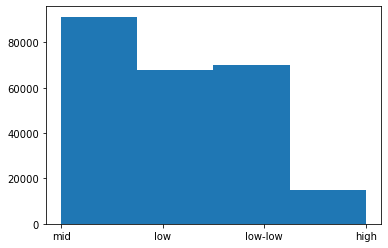

In [49]:
labels = ['low-low', 'low', 'mid', 'high']
bins = [ 0, 500, 1000, 2000, 4000]

df['elevation_bins'] = pd.cut(df['elevation'] , bins=bins, labels=labels, include_lowest=True)
plt.hist(df['elevation_bins'], bins=4)
plt.show()

In [50]:
elevation_low_low.mean_temp.mean()

15.332976720922293

In [51]:
elevation_low.mean_temp.mean()

11.696587936242054

In [52]:
elevation_mid.mean_temp.mean()

11.076580374163079

In [53]:
elevation_high.mean_temp.mean()

6.68765012591305

df['elevation_bottom_low'] = (df.elevation < 500.0)
df['elevation_top_low'] = (df.elevation >= 500.0)&(df.elevation <1000)
df['elevation_mid'] = (df.elevation >=1000)&(df.elevation<2000)
df['elevation_high'] = df(df.elevation>=2000)

In [56]:
bins = [0, 500, 1000, 2000, 4000]
names = ['bottom_low', 'top_low', 'mid', 'high']

df['elevation_range'] = pd.cut(df['elevation'], bins, labels=names)

print(df.dtypes)


region                         object
elevation                     float64
lat                           float64
lon                           float64
startdate              datetime64[ns]
potential_evap                float64
precip                        float64
barometric_pressure           float64
all_atmos_precip              float64
relative_humidity             float64
sea_level_press               float64
mean_temp                     float64
height_10_mb                  float64
height_100_mb                 float64
height_500_mb                 float64
height_850_mb                 float64
zonal_wind_250mb              float64
zonal_wind_925mb              float64
long_wind_250mb               float64
long_wind_925mb               float64
elevation_bins               category
elevation_range              category
dtype: object


In [59]:
df.elevation_range.mode()

0    mid
Name: elevation_range, dtype: category
Categories (4, object): ['bottom_low' < 'top_low' < 'mid' < 'high']

In [60]:
df.elevation_range.plot

<AxesSubplot:xlabel='mean_temp', ylabel='Count'>

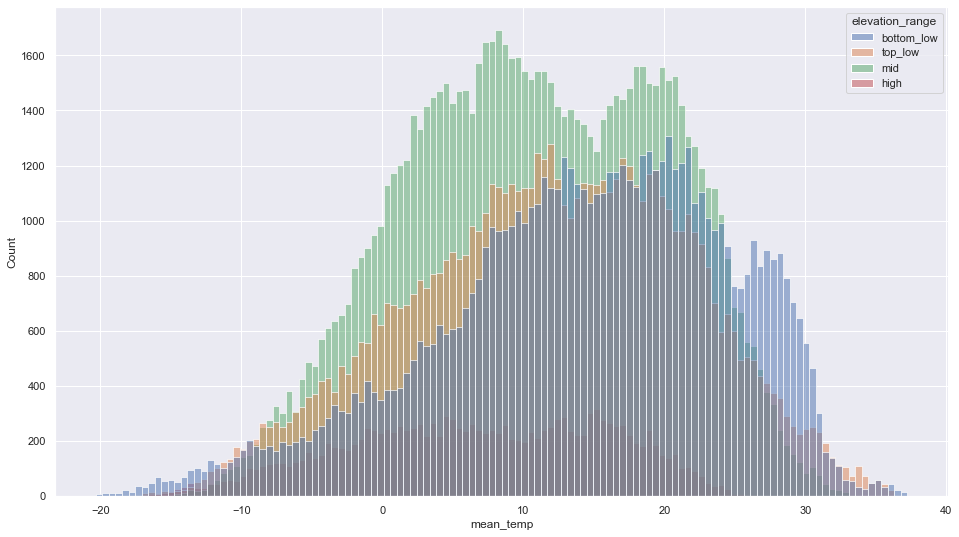

In [68]:
sns.histplot(data = df, x = 'mean_temp', hue = 'elevation_range')

<AxesSubplot:xlabel='mean_temp', ylabel='region'>

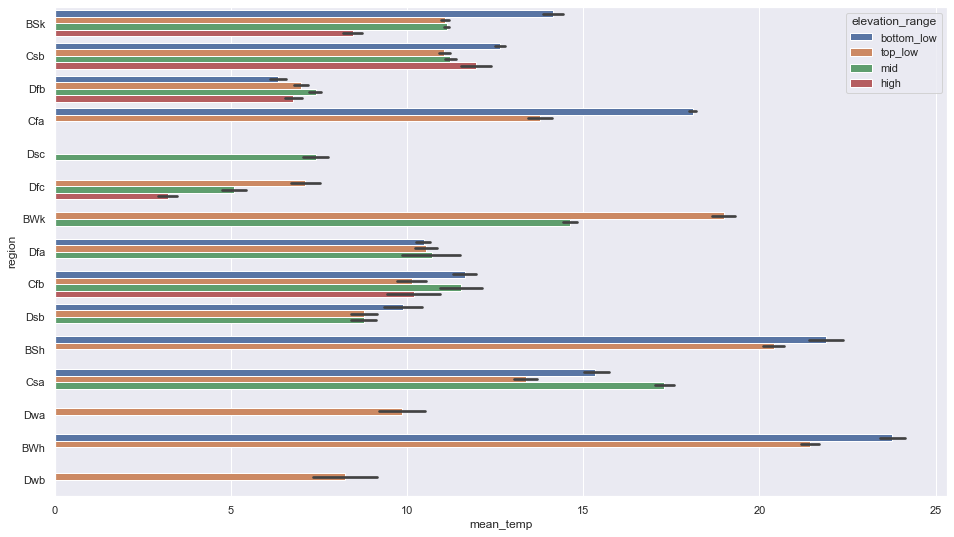

In [69]:
sns.barplot(data=df, x= 'mean_temp', y = 'region', hue = 'elevation_range')

In [70]:
df.region.value_counts(normalize=True)

BSk    0.371009
Dfb    0.140792
Cfa    0.138175
Csb    0.109104
Dfa    0.060096
BWk    0.037011
Dfc    0.032838
BWh    0.025460
Csa    0.025247
Dsb    0.021570
BSh    0.013438
Cfb    0.011596
Dsc    0.007878
Dwa    0.003906
Dwb    0.001879
Name: region, dtype: float64